In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('E:/data/mlcourse.ai/1/A1/adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
print(df.shape)

(32561, 15)


In [52]:
# 15 variables are there in the data 
#let's try listing them out 
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [53]:
# let's try acessing general information from the data 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [54]:
# we can say that there isn't any null object present in the data 
# 6 variables are integers 
#9 variables are objects

In [55]:
#  How many men and women (sex feature) are represented in this dataset?
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [56]:
# What is the average age (age feature) of women?
df.groupby('sex')['age'].agg([np.mean])


,mean
sex,
Female,36.858230
Male,39.433547


In [57]:
# 3. What is the percentage of German citizens (native-country feature)?
df['native-country'].value_counts(normalize=True)
# .4207% of citizens are german

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [58]:
'''4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?'''

'4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?'

In [59]:
df.groupby('salary')['age'].agg([np.mean,np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


In [60]:
'''6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)'''

'6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)'

In [61]:
df['education'].value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

In [62]:
df[['education','education-num']].drop_duplicates(['education','education-num'])

,education,education-num
0,Bachelors,13
2,HS-grad,9
3,11th,7
5,Masters,14
6,9th,5
10,Some-college,10
13,Assoc-acdm,12
14,Assoc-voc,11
15,7th-8th,4
20,Doctorate,16


In [63]:
df['higher_education']=(df['education-num']>10).astype('int')
pd.crosstab(df['higher_education'] , df['salary'],margins=True)

salary,<=50K,>50K,All
higher_education,,,
0,18739,3306,22045
1,5981,4535,10516
All,24720,7841,32561


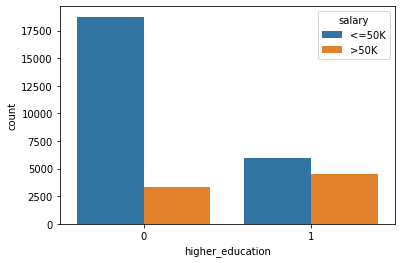

In [64]:
sns.countplot(x='higher_education',hue='salary',data=df);

In [65]:
# ,for education-num >10, it can be seen that people earning > 50k are less than people earning <= 50 k. 
# therfore it isn't true that people who earn more than 50 k have higher education.

In [66]:
"""7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

"""

'7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.\n\n'

In [67]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,higher_education
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [68]:
column_to_show = ['age','sex']
df.groupby(['race'])[column_to_show].describe(percentiles=[])



age                                        
                      count       mean        std   min   50%   max
race                                                               
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  35.0  82.0
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  36.0  90.0
Black                3124.0  37.767926  12.759290  17.0  36.0  90.0
Other                 271.0  33.457565  11.538865  17.0  31.0  77.0
White               27816.0  38.769881  13.782306  17.0  37.0  90.0

In [69]:
# maximum age of amer indian eskimo race is 82.

In [70]:
'''8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.'''

'8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.'

In [71]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,higher_education
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


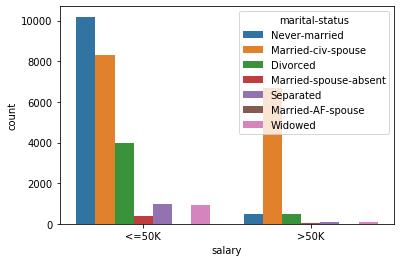

In [72]:

sns.countplot(x='salary',hue='marital-status',data=df);

In [73]:
# it can be said after looking at the data that married-civ-spouse earn a lot.

In [74]:
'''9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?'''

'9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?'

In [123]:
df.groupby(['hours-per-week'])['salary'].describe(percentiles=[])

,count,unique,top,freq
hours-per-week,,,,
1,20,2,<=50K,18
2,32,2,<=50K,24
3,39,2,<=50K,38
4,54,2,<=50K,51
5,60,2,<=50K,53
...,...,...,...,...
95,2,2,<=50K,1
96,5,2,<=50K,4
97,2,2,<=50K,1


In [86]:
# max # of hours a person works is 99 hours.
# no. of people working 99 hours /week = 85

In [87]:
df.groupby(['hours-per-week'])['salary'].describe(percentiles=[])

,count,unique,top,freq
hours-per-week,,,,
1,20,2,<=50K,18
2,32,2,<=50K,24
3,39,2,<=50K,38
4,54,2,<=50K,51
5,60,2,<=50K,53
...,...,...,...,...
95,2,2,<=50K,1
96,5,2,<=50K,4
97,2,2,<=50K,1


In [108]:
a = df[df['salary'].apply(lambda salary:salary[:]=='>50K')]

In [122]:
a['hours-per-week'].value_counts()

40    3247
50    1276
45     685
60     648
55     323
      ... 
95       1
29       1
17       1
96       1
73       1
Name: hours-per-week, Length: 80, dtype: int64

In [120]:
a.sort_values(by='hours-per-week', ascending= False)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,higher_education
30610,51,Self-emp-not-inc,24790,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K,0
31681,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K,0
29989,43,Local-gov,118853,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,4386,0,99,United-States,>50K,0
30036,40,Private,25005,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,99,United-States,>50K,1
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31390,61,?,584259,Masters,14,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,>50K,1
20563,62,?,378239,Masters,14,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,>50K,1
19353,67,Self-emp-not-inc,148690,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Male,18481,0,2,United-States,>50K,1
20072,65,?,76043,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K,0


In [124]:
a.groupby(['hours-per-week'])['salary'].describe(percentiles=[])

,count,unique,top,freq
hours-per-week,,,,
1,2,1,>50K,2
2,8,1,>50K,8
3,1,1,>50K,1
4,3,1,>50K,3
5,7,1,>50K,7
...,...,...,...,...
95,1,1,>50K,1
96,1,1,>50K,1
97,1,1,>50K,1


In [125]:
# here it can be said that 25 people out 85 earn more 50K.


In [126]:
'''10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?'''

'10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?'

In [128]:
col2= ['salary','hours-per-week']
df.groupby(['native-country'])[col2].describe(percentiles=[])

hours-per-week                                    \
                                    count       mean        std   min   50%   
native-country                                                                
?                                   583.0  41.512864  12.427774   1.0  40.0   
Cambodia                             19.0  40.894737   2.514287  40.0  40.0   
Canada                              121.0  40.404959  13.173571   8.0  40.0   
China                                75.0  37.786667  11.057947   1.0  40.0   
Columbia                             59.0  39.067797   8.709615   5.0  40.0   
Cuba                                 95.0  39.157895  10.784461   5.0  40.0   
Dominican-Republic                   70.0  42.471429  11.051554  22.0  40.0   
Ecuador                              28.0  39.571429  10.235843  22.0  40.0   
El-Salvador                         106.0  36.792453   9.531619   3.0  40.0   
England                              90.0  41.833333  14.012234   7.0  40.0   
France                               29.0  45.068966  14.718625  15.0  42.0   
Germany                             137.0  41.014599  12.328223   6.0  40.0   
Greece                               29.0  44.241379  15.929880   4.0  40.0   
Guatemala                            64.0  39.234375   6.519183  18.0  40.0   
Haiti                                44.0  36.909091  11.776639  10.0  40.0   
Holand-Netherlands                    1.0  40.000000        NaN  40.0  40.0   
Honduras                             13.0  36.307692  10.904010  17.0  40.0   
Hong                                 20.0  40.900000   6.820248  30.0  40.0   
Hungary                              13.0  35.615385  18.527180   3.0  40.0   
India                               100.0  41.530000  12.295565   8.0  40.0   
Iran                                 43.0  43.976744  11.863285   6.0  40.0   
Ireland                              24.0  42.416667   8.355767  25.0  40.0   
Italy                                73.0  41.602740  13.650132   6.0  40.0   
Jamaica                              81.0  38.592593   9.249024  10.0  40.0   
Japan                                62.0  43.693548  13.985459  10.0  40.0   
Laos                                 18.0  40.333333   3.865382  31.0  40.0   
Mexico                              643.0  40.340591  10.497768   4.0  40.0   
Nicaragua                            34.0  36.176471   8.426044  11.0  40.0   
Outlying-US(Guam-USVI-etc)           14.0  41.857143  10.747859  24.0  40.0   
Peru                                 31.0  35.387097  11.283254   4.0  40.0   
Philippines                         198.0  39.595960  10.706437   8.0  40.0   
Poland                               60.0  38.333333  11.715073   3.0  40.0   
Portugal                             37.0  41.891892   8.717109  30.0  40.0   
Puerto-Rico                         114.0  38.570175   9.842988   6.0  40.0   
Scotland                             12.0  41.250000   9.799119  20.0  40.0   
South                                80.0  42.412500  16.409856   4.0  40.0   
Taiwan                               51.0  38.882353  15.249455   2.0  40.0   
Thailand                             18.0  45.444444  20.071115  10.0  40.0   
Trinadad&Tobago                      19.0  37.368421  11.800238  14.0  40.0   
United-States                     29170.0  40.447755  12.417203   1.0  40.0   
Vietnam                              67.0  37.343284  11.962761   1.0  40.0   
Yugoslavia                           16.0  44.562500  11.581415  20.0  40.0   

                                  
                             max  
native-country                    
?                           99.0  
Cambodia                    50.0  
Canada                      72.0  
China                       60.0  
Columbia                    60.0  
Cuba                        70.0  
Dominican-Republic          98.0  
Ecuador                     66.0  
El-Salvador                 60.0  
England                     99.0  
France          

In [129]:
# for Japan mean hours-per week  is 43.7 hours  

In [159]:
b

count       mean        std   min   50%   max
native-country salary                                               
Japan          <=50K    38.0  41.000000  11.902759  10.0  40.0  65.0
               >50K     24.0  47.958333  16.120414  21.0  42.5  99.0

In [158]:

df[df['native-country']=='Japan'].groupby(['native-country','salary'])['hours-per-week'].describe(percentiles=[])

count       mean        std   min   50%   max
native-country salary                                               
Japan          <=50K    38.0  41.000000  11.902759  10.0  40.0  65.0
               >50K     24.0  47.958333  16.120414  21.0  42.5  99.0

In [160]:
df.groupby(['native-country','salary'])['hours-per-week'].describe(percentiles=[])

count       mean        std   min   50%   max
native-country salary                                                
?              <=50K    437.0  40.164760  12.817002   1.0  40.0  99.0
               >50K     146.0  45.547945  10.202827   8.0  40.0  80.0
Cambodia       <=50K     12.0  41.416667   3.088346  40.0  40.0  50.0
               >50K       7.0  40.000000   0.000000  40.0  40.0  40.0
Canada         <=50K     82.0  37.914634  13.012056   8.0  40.0  70.0
...                       ...        ...        ...   ...   ...   ...
United-States  >50K    7171.0  45.505369  11.025092   1.0  40.0  99.0
Vietnam        <=50K     62.0  37.193548  12.422664   1.0  40.0  77.0
               >50K       5.0  39.200000   1.788854  36.0  40.0  40.0
Yugoslavia     <=50K     10.0  41.600000  11.305849  20.0  40.0  66.0
               >50K       6.0  49.500000  11.202678  40.0  46.0  65.0

[82 rows x 6 columns]